pytorch中操作的对象都是tensor，与Numpy中的ndarray对应，区别在于ndarray只支持CPU计算，tensor还支持GPU计算，且tensor支持自动微分

In [21]:
import numpy as np
import torch

a = torch.arange(0,12)
a.shape
a.numel()
len(a)

x = a.reshape((3,2,2)) #reshape中的几个维度可以加括号看成是一个参数，也可以分开
print(x)

b = torch.zeros(2,4) #类似直接赋值的操作需要将所有维度看成是一个参数数组
print(b)

n = torch.randn(2,3) #服从标准高斯正态分布
print(n)

print(torch.tensor([[1,2],[2,3]]))
print(np.array([[1,2],[2,3]]))



tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[-0.3864, -0.6633, -1.0170],
        [-1.3138, -0.1203, -0.0447]])
tensor([[1, 2],
        [2, 3]])
[[1 2]
 [2 3]]


torch中的tensor一般的运算符遵从按单个元素进行操作的规则，计算规则也和Numpy类似

In [37]:
x = torch.tensor([1,2,3])
y = torch.tensor([2.0,2.0,3.0])
z = torch.exp(x)

print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x**y)

print(torch.log(x))
print(torch.exp(y))

# torch中的两个数组合并的逻辑也是和numpy中一样的 numpy中的数组合并函数是concatenate torch中的函数是cat 这里的形参是dim 而不是axe
a = torch.cat((x,y,z),dim=0)
b = torch.cat((x.reshape(1,3),y.reshape(1,3),z.reshape(1,3)))
print(a)
print(b)

# torch也可以和ndarray一样做逻辑运算
print(x == y)

x.sum()

tensor([3., 4., 6.])
tensor([-1.,  0.,  0.])
tensor([2., 4., 9.])
tensor([0.5000, 1.0000, 1.0000])
tensor([ 1.,  4., 27.])
tensor([0.0000, 0.6931, 1.0986])
tensor([ 7.3891,  7.3891, 20.0855])
tensor([ 1.0000,  2.0000,  3.0000,  2.0000,  2.0000,  3.0000,  2.7183,  7.3891,
        20.0855])
tensor([[ 1.0000,  2.0000,  3.0000],
        [ 2.0000,  2.0000,  3.0000],
        [ 2.7183,  7.3891, 20.0855]])
tensor([False,  True,  True])


tensor(6)

torch中的tensor也支持广播机制

In [39]:
x = torch.tensor([1,2,3]).reshape(3,1)
y = torch.tensor([1,2]).reshape(1,2)

print(x)
print(y)
print(x+y) # 3*2



tensor([[1],
        [2],
        [3]])
tensor([[1, 2]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


tensor可以类似普通数组一样进行索引和切片读取赋值

In [44]:
x = torch.arange(12).reshape(3,4)
print(x)
x[1,1] = 10
print(x)
x[0:2,:] = 11
print(x)
x[:,1] = torch.tensor([1,2,3]) #多个值和多个值对应的时候需要用tensor来进行赋值
print(x)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4, 10,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[11, 11, 11, 11],
        [11, 11, 11, 11],
        [ 8,  9, 10, 11]])
tensor([[11,  1, 11, 11],
        [11,  2, 11, 11],
        [ 8,  3, 10, 11]])


torch.tensor对象通常在网络中会比较大，所以对于能优化计算和存储效率的手段我们都可以使用，因此有了下面的探讨：

In [46]:
x = torch.arange(12).reshape(3,-1)
print(id(x))
x = x + 1
print(id(x)) #普通的计算会使得存储位置发生变化，本质也就是放置了两个这样的tensor

#但我们可以用两种写法来进行原地操作,原地操作可以让tensor操作发生在本地
y = torch.arange(12).reshape(3,-1)
print(id(y))
y += 1
print(id(y))

print(id(y))
y[:,:] = y + 1
print(id(y))

1375361129424
1375359918608
1375361134544
1375361134544
1375361134544
1375361134544


tensor作为torch中的基础操作对象，也可以灵活地向其他python变量进行转换

In [54]:
a = torch.tensor([1,2,3.0])
print(a)
b = a.numpy() #tensor转换为ndarray
print(b)
c = torch.tensor(b) #普通数组和ndarray转换为tensor
print(c)

x = a.sum()
print(x)
print(x.item()) #单个tensor使用item()直接转换成普通变量
print(float(x)) #只能在单个tensor中进行转换

tensor([1., 2., 3.])
[1. 2. 3.]
tensor([1., 2., 3.])
tensor(6.)
6.0
6.0


这一部分的代码是对pandas的简单使用、如何创建一个csv文件，以及如何读取一个csv文件

In [57]:
import os
import pandas as pd

os.makedirs(os.path.join("..","data"),exist_ok=True)
data_file = os.path.join("..","data","tiny_data.csv")
with open(data_file,"w") as f:
    f.write('NumRooms,Alley,Price\n') #第一行一般是列名
    f.write('NA,Pave,127500\n') 
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

data = pd.read_csv(data_file)
print(data)


   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


通常在直接使用现成的数据集中，需要对数据集进行一系列的预处理和清洗，所以基础的一些预备操作是必要的，比如按照自己的要求来读取不同位置的数据，对不是数值的数据进行富有意义的赋值

In [72]:
inputs, inputs_1, outputs = data.iloc[:,0:1],data.iloc[:,1],data.iloc[:,2] #连续赋值，iloc是pandas对象的方法
print(inputs)
print(inputs_1)
print(outputs,end = "\n\n")

inputs = inputs.fillna(inputs.mean())
print(inputs)

inputs_1 = pd.get_dummies(inputs_1,dummy_na = True) #填充字符的方法
print(inputs_1)

x = torch.tensor(inputs.to_numpy(dtype = float),dtype = torch.float32)  #需要学习的方法是pandas对象有多个to_numpy、to_XXX之类的操作
print(x)



   NumRooms
0       NaN
1       2.0
2       4.0
3       NaN
0    Pave
1     NaN
2     NaN
3     NaN
Name: Alley, dtype: object
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

   NumRooms
0       3.0
1       2.0
2       4.0
3       3.0
    Pave    NaN
0   True  False
1  False   True
2  False   True
3  False   True
tensor([[3.],
        [2.],
        [4.],
        [3.]])


torch中的tensor是一个抽象的概念，它可以参与到线性代数的所有操作中，线性代数的操作对象包括标量、向量、矩阵、张量等，这些对象都可以使用tensor来表示

In [81]:
x = torch.tensor(3.0)
y = torch.tensor(4.0)
print(x**y) # 标量操作

z = torch.arange(4)
print(len(z),z.shape) #z 作为一个tensor向量，也可以调用普通的数组的一些函数

a = torch.arange(12).reshape(3,4)
print(a)
print(a.T) # 对于tensor矩阵，可以调用a.T的写法输出转置矩阵

b = torch.arange(24).reshape(2,3,4)
print(b)



tensor(81.)
4 torch.Size([4])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


张量的基本运算都围绕单个元素展开，围绕单个元素展开的运算都不会改变张量的形状

In [83]:
a = torch.arange(12).reshape(3,4)
b = a.clone()

print(a+b)
print(a*b)

print(a+2)
print(a*2)


tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]])
tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121]])
tensor([[ 2,  3,  4,  5],
        [ 6,  7,  8,  9],
        [10, 11, 12, 13]])
tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]])


很多时候需要对一个Tensor进行降维，降维的操作通常发生在求均值、求和的场景中，所以可以深挖在tensor中的这些操作的逻辑

In [96]:
a = torch.arange(12).reshape(3,4)
print(a.shape,a.sum()) # a.sum()的写法会粗暴地将一个Tensor强行变成一个标量，所以我们也可以类似torch.cat一样指定维度，实现特定维度降维

print(a.sum(dim = 0))
print(a.sum(dim = 1))
print(a.sum(dim = -1)) #默认最后一个维度
print(a.sum(dim = [0,1])) # 也可以把dim写成axis

print(a.mean(dtype=torch.float)) #这里必须得给dtype 有改版
print(a.sum()/a.numel())

print(a.mean(dim = 1,dtype = torch.float),a.mean(dim=0,dtype = torch.float).shape) #这样的处理往往会坍缩，因为向量不管是ndarray还是tensor,都不会指定是竖排还是横排的向量，即使是切片

#由此引申出向量的保留维度操作
print(a.mean(dim = 0,keepdim = True,dtype = torch.float),a.mean(dim = 0,keepdim = True,dtype = torch.float).shape)
#在保留维度的同时，我们可以利用广播机制来计算一些值
print(a)
print(a / a.sum(dim=1,keepdim=True))

print(a.cumsum(dim=1))




torch.Size([3, 4]) tensor(66)
tensor([12, 15, 18, 21])
tensor([ 6, 22, 38])
tensor([ 6, 22, 38])
tensor(66)
tensor(5.5000)
tensor(5.5000)
tensor([1.5000, 5.5000, 9.5000]) torch.Size([4])
tensor([[4., 5., 6., 7.]]) torch.Size([1, 4])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895]])
tensor([[ 0,  1,  3,  6],
        [ 4,  9, 15, 22],
        [ 8, 17, 27, 38]])
torch.return_types.cummax(
values=tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
indices=tensor([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]))


torch中的tensor会以向量、矩阵、张量的形式参与多种计算中，例如点积、矩阵向量乘积、矩阵矩阵乘积

In [13]:
import torch 

a = torch.tensor([1.0,2.0,3.0,4.0])
b = torch.ones(4,dtype = torch.float32) #这里如果定义一个(1*4)的向量也不能参与dot运算
print(torch.dot(a,b))
print((a*b).sum())

X = torch.arange(12).reshape(3,4)
print(X)
print(torch.mv(X,b.long()))

Y = torch.arange(20).reshape(4,5)
print(Y)
print(torch.mm(X,Y)) #必须严格按照矩阵乘法的规则定维度

tensor(10.)
tensor(10.)
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 6, 22, 38])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([[ 70,  76,  82,  88,  94],
        [190, 212, 234, 256, 278],
        [310, 348, 386, 424, 462]])


通常在线代和优化中还有范数的概念，范数的计算可以从0-范数、1-范数、2-范数、p-范数等等，常用的计算还有F-范数

In [15]:
print(a)
print(torch.abs(a).sum()) # 这样的操作可以计算1-范数
print(torch.norm(a))  # torch.norm的计算通常可以用在2-范数
print(X)
print(torch.norm(X.float())) # F-范数

tensor([1., 2., 3., 4.])
tensor(10.)
tensor(5.4772)
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor(22.4944)


深度学习很多的任务都是围绕着损失函数的减小展开的，所以损失函数和参数必须以可导可微分的角度布置，在深度学习中研究微积分的计算也是必要的

In [10]:
def f(x):
    return 3 * x ** 2 - 4 * x

def cal_wei(f,x,h):
    return (f(x+h) - f(x)) / h


num = 1.0
h = 1.0
for i in range(4):
    print(f"when h is {h:.5f},the var is {cal_wei(f,num,h):.5f}")
    h *= 0.1 #越发接近该点真实导数值的过程

when h is 1.00000,the var is 5.00000
when h is 0.10000,the var is 2.30000
when h is 0.01000,the var is 2.03000
when h is 0.00100,the var is 2.00300


In [51]:
import torch
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
import numpy as np

def set_style(size):
    backend_inline.set_matplotlib_formats("svg")
    plt.rcParams["figure.figsize"] = size

def set_plotstyle(axes,xlim,ylim,xscale,yscale,xlabel,ylabel,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X,Y=None,xlabel=None,ylabel=None,xscale="linear",yscale="linear",xlim=None,ylim=None,axes=None,legend=None,fmts=['-', 'm--', 'g-.', 'r:'],fig_size= [3.5,2.5]):
    if not legend:
        legend = []
    set_style(fig_size)

    axes = axes if axes else plt.gca()

    def has_oneaxis(x):
        return hasattr(x,"ndim") and x.ndim==1 or isinstance(x,list) and not hasattr(x[0],"__len__")
    
    if has_oneaxis(X):
        X = [X]

    if Y is None:
        X,Y = []*len(X),X
    elif has_oneaxis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)

    axes.cla()

    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y,fmt)
    
    set_plotstyle(axes,xlim,ylim,xscale,yscale,xlabel,ylabel,legend)



        

    


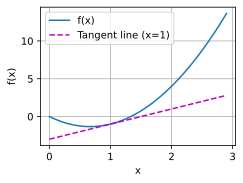

In [22]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x- 3], xlabel = 'x', ylabel = 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

在研究导数的基础上，对于多元函数，则可以引出梯度和链式法则的概念，但手工的去计算每一个参数的梯度，再单个地去更新效率很低，深度学习框架通过**计算图**来记录每一个需要更新地参数，通过正向求导和反向梯度传播来跟踪计算图，填充每个参数的偏导数

In [30]:
x = torch.arange(4.0)
print(x)
x.requires_grad_(True) #注意这里如果不在定义变量的时候requires_grad，就需要写就地的操作，函数名的最后有一个"_"的代表就地操作
print(x.grad)

y = 2 * torch.dot(x,x)
y.backward()
print(x.grad)
print(x.grad == 4 * x)

x.grad.zero_()
y = x.sum()
y.backward()
print(x.grad)



tensor([0., 1., 2., 3.])
None
tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])
tensor([1., 1., 1., 1.])


但在通常情况下，网络输出的结果并不直接是一个标量，往往是以多维数据(一个batch里有多个数据)的形式输出，在这样的情况下对参数求导得到的就是一个矩阵，这对于参数的更新其实是无意义的，我们完全可以把对于单个参数的梯度反传做一个合并，例如下面的做法：

In [2]:
import torch 

x = torch.arange(4.0)
x.requires_grad_()
print(x.grad)

y = x * x
y.sum().backward()
print(x.grad)


None
tensor([0., 2., 4., 6.])


caffe、tensorflow1.x等深度学习框架可以分类为静态计算图(显式计算图)，这指的是网络的计算流在结构定义完成后是不可动的，甚至会有一个单独的文件来存储网络结构的计算流
但tensorflow2.x、pytorch可以在代码运行的过程中构建计算图，算成动态计算图(隐式计算图)，这使得引出下面的两部分示例代码内容，说明了网络结构的计算图的动态可调整性，我们可以在网络结构中引入选择、循环等操作，计算图仍可以按照我们预想的那样定义，也可以在网络中设置一些无需梯度计算的部分

关于网络的部分参数脱离于计算图之外，引入一部分额外的补充内容如下：

In [43]:
a = torch.randn(3,requires_grad=True)
b = a.clone()

'''tensor分为两部分,第一部分是头文件存储tensor的基本信息,另一部分是tensor本身的数据内容,可以用storage()调用查看\
头文件部分无法直接访问,但可以通过dtype、ndim等访问'''

print(a)
print(a.storage())
print(a.storage().data_ptr()) #输出的是tensor数据部分的首个地址
print(b.storage().data_ptr())
print(a.data_ptr())
print(b.data_ptr()) #clone的tensor不共享内存地址


x = a.sum()
x.backward()
print(a.grad)

y = b.sum()
y.backward()
print(b.grad)
print(a.grad) #b.grad会有输出警告提示,原因在于虽然是复制的，b是有梯度的，但b这时不再是叶子结点，他的梯度会回流到a上，也就是造成梯度的累加，这时的计算图可以想象成是两股的汇聚，到a上

c = torch.ones_like(a).copy_(a)
print(c) #copy和clone对梯度的影响是一致的，只不过是调用对象不一样，clone是原tensor，copy是现在的tensor

tensor([-0.7988,  0.9686, -0.2153], requires_grad=True)
 -0.798803985118866
 0.9685550332069397
 -0.21528464555740356
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]
3421558019776
3421558022208
3421558019776
3421558022208
tensor([1., 1., 1.])
None
tensor([2., 2., 2.])
tensor([-0.7988,  0.9686, -0.2153], grad_fn=<CopyBackwards>)


C:\Users\10376\AppData\Local\Temp\ipykernel_45916\3010518522.py:21: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad)


In [46]:
a = torch.randn(3,requires_grad=True)
b = a.detach() #直接这样就会报错，detach()创建的tensor会共享内存地址，但不会在计算图内，因此根据b来进行梯度回传就会发生错误，我们给出下面的例子做对比

print(a)
print(b)
print(a.data_ptr())
print(b.data_ptr())

x = a.sum()
x.backward()
print(a.grad)
y = b.sum()
y.backward()
print(b.grad)
print(a.grad)


tensor([ 1.8693, -0.7127,  0.3450], requires_grad=True)
tensor([ 1.8693, -0.7127,  0.3450])
3421558022272
3421558022272
tensor([1., 1., 1.])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [48]:
a = torch.randn(3,requires_grad=True)
b = a.detach()
b.requires_grad_() 

print(a)
print(b)
print(a.data_ptr())
print(b.data_ptr())

x = a.sum()
x.backward()
print(a.grad)
y = b.sum()
y.backward()
print(b.grad)
print(a.grad) #b在重新需要梯度之后，就可以计算梯度，也会参与到计算图中，但这时a和b都是叶子结点，就会使得b的梯度不会回传到a中


tensor([0.6300, 0.9633, 0.0653], requires_grad=True)
tensor([0.6300, 0.9633, 0.0653], requires_grad=True)
3421558020608
3421558020608
tensor([1., 1., 1.])
tensor([1., 1., 1.])
tensor([1., 1., 1.])


In [50]:
def f(a):
 b = a * 2
 while b.norm() < 1000:
    b = b * 2
 if b.sum() > 0:
    c = b
 else:
    c = 100 * b
 return c

a = torch.randn(size=(),requires_grad=True) #单个tensor可以用size = ()来描述
b = f(a)
b.backward()
print(a.grad)
print(a.grad == b/a)

tensor(8192.)
tensor(True)


这部分想说的是在深度学习中，概率论也是无法跳开的内容，因此可以用python和pytorch来实现一些基础的概率学操作帮助初学者理解

tensor([0., 0., 0., 0., 0., 1.]) tensor([0., 2., 1., 1., 3., 3.])
tensor([0.1715, 0.1665, 0.1624, 0.1666, 0.1692, 0.1638])
torch.Size([500, 6])
torch.Size([500, 6])
torch.Size([500, 6])


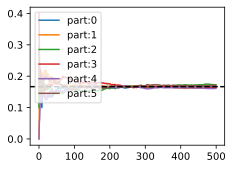

In [72]:
import torch
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt
from torch.distributions import multinomial

num = 6
probs = torch.ones(num)/num

sample1 = multinomial.Multinomial(1,probs).sample()
sample2 = multinomial.Multinomial(10,probs).sample()
print(sample1,sample2) #表示在特定的分布下随机抽样n次的一个例子

big_num = 10000
print(multinomial.Multinomial(big_num,probs).sample()/big_num) #大数定理下频率约等于概率

iteration = 500
origin_data = multinomial.Multinomial(10,probs).sample((iteration,)) #注意多次采样的规范格式
print(origin_data.shape)
cum_data = origin_data.cumsum(dim=0)
print(cum_data.shape)
data_probs = cum_data / cum_data.sum(dim=1,keepdim=True)
print(data_probs.shape)

fig, axe = plt.subplots()
for i in range(num):
    axe.plot(data_probs[:,i].numpy(),label = f"part:{i}")
plt.axhline(y=0.1666,color="black",linestyle="dashed")
plt.legend()


pytorch中的函数和包非常多，因此需要基本的查询文档的能力

In [ ]:
import torch

print(dir(torch.distributions)) #查看包里的所有函数或类

help(torch.distributions.multinomial) #这可以查看类或函数的具体说明

'''在jupyter中还有一个小技巧'''
torch.ones?? #即可查看具体函数的用法之类的信息

Docstring:
ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `1`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_device`). :attr:`device` wil